# Victor Manuel Gómez Espinosa


# Librerias y funciones

In [4]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [13]:
import prince

In [14]:
from Formulas_mult import *

In [15]:
df=pd.read_csv('FrenchFoodData.csv')

In [16]:
#renombrando 
names=df['Unnamed: 0'].values
new_names=[]
for name in names:
    if('MA' in name):
        Nname='MA'
    elif('EM' in name):
        Nname='EM'
    else:
        Nname='CA'
    new_names.append(Nname)
df['Unnamed: 0']=new_names

In [17]:
df

,Unnamed: 0,bread,vegetables,fruits,meat,poultry,milk,wine
0,MA,332,428,354,1437,526,247,427
1,EM,293,559,388,1527,567,239,258
2,CA,372,767,562,1948,927,235,433
3,MA,406,563,341,1507,544,324,407
4,EM,386,608,396,1501,558,319,363
5,CA,438,843,689,2345,1148,243,341
6,MA,534,660,367,1620,638,414,407
7,EM,460,699,484,1856,762,400,416
8,CA,385,789,621,2366,1149,304,282
9,MA,655,776,423,1848,759,495,486


In [74]:
df=df.groupby('Unnamed: 0').sum()
df.columns.rename('Alimentos', inplace=True)
df.index.rename('Familias', inplace=True)
df

Alimentos,bread,vegetables,fruits,meat,poultry,milk,wine
Familias,,,,,,,
CA,1710,3496,2759,9289,4391,1343,1340
EM,1723,2861,1816,6940,2780,1476,1356
MA,1927,2427,1485,6412,2467,1480,1727


con libreria prince

In [76]:
ca=prince.CA(n_components=2,check_input=True,engine='auto',random_state=42)
ca=ca.fit(df)

In [77]:
y=ca.row_coordinates(df) #Familias
y

,0,1
CA,0.128140,-0.011790
EM,-0.030011,0.036471
MA,-0.142182,-0.022560


In [78]:
z=ca.column_coordinates(df) #Alimentos
z

,0,1
bread,-0.176256,-0.005961
vegetables,0.017195,0.038409
fruits,0.128575,0.001349
meat,0.027540,-0.001881
poultry,0.118157,-0.025218
milk,-0.170390,0.043195
wine,-0.229551,-0.048309


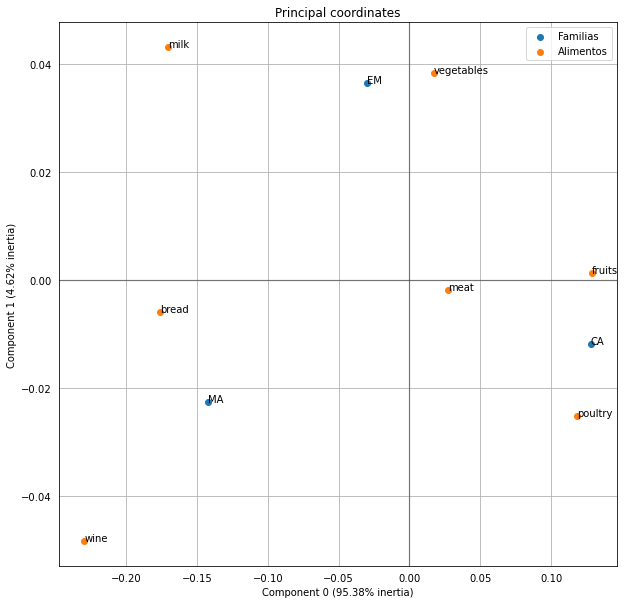

In [79]:
ax=ca.plot_coordinates(X=df, figsize=(10,10), x_component=0, y_component=1, show_row_labels=True, show_col_labels=True)


In [80]:
ca.eigenvalues_

[0.01272606493778471, 0.0006161765519772263]

In [81]:
ca.total_inertia_ 

0.013342241489761932

In [82]:
ca.explained_inertia_

[0.9538176135958834, 0.04618238640411693]

In [83]:
independenciaCA(df) #False: renglones y columnas no son independientes

(False, (816.6118903808788, 21.02606981748307))